# Logistic Regression Exercise

Now it's your turn to implement logistic regression on a new data set. For this purpose we use the Titanic Dataset. It includes personal information of all passengers on the Titanic as well as they survived the sinking of the Titanic or died.

Here’s the **Data Dictionary** of the dataset:

- PassengerID: type should be integers

- Survived: survived or not

- Pclass: class of Travel of every passenger

- Name: the name of the passenger

- Sex: gender

- Age: age of passengers

- SibSp: No. of siblings/spouse aboard

- Parch: No. of parent/child aboard

- Ticket: Ticket number

- Fare: what Prices they paid

- Cabin: cabin number

- Embarked: the port in which a passenger has embarked.

        - C: Cherbourg , S: Southampton , Q: Queenstown


You will find the data in the data folder (it's a zip folder, so you first have to unzip it).


## What you should do:

- conduct a brief EDA to become familiar with the data
- use Logistic Regression to predict if a passenger died or not

## How to do it:

Time is short, so aim for the simplest viable product first:
1. Load the data

2. Separate features and target 

3. Split the data in train and test

3. Get a quick overview of the train data

4. Agree on a classification metric for the task 

5. Create a simple heuristic/educated guess for the classification first. This is called a "baseline model". It is used to compare more complex models later (in this case: logistic regression). You as a data scientist want to prove how much your work/ML could improve the business metric, therefore you need a baseline model for comparison. In some cases you want to improve on an already existing model in your company which would be your baseline model then. In other cases, there are typical baseline models used in the specific field. For other tasks, you have to come up with a simple but meaningful idea, how to classify the data based on your business understanding (EDA). A baseline model should follow Occam’s Razor principle: "A simple model is the best model". 
    - Example of a baseline model: 
    If the task is to classify cats and dogs, a baseline model could be: We classify every animal as cat if its weight < 5 kg, otherwise the animal is classified as a dog. (The value of 5 kg is an educated guess, based on our business understanding/EDA.) 

6. use one or two already numerical features to create a simple first model
    -  did it even beat your base model?

7. Now you can go through the data science lifecycle again and again:
    - clean the data better

    - get more insights with EDA

    - add more features

    - do feature engineering 
    
    and check if your work improves your model further!

8. Stop whenever time is up or you cannot improve your model any further.

This repo a solution to this problem. If you want to compare your final result with the result of this repo solution, choose **25** as random seed and a test size of 30% for your train test split.

### EDA

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [114]:
df = pd.read_csv('data/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
df.Cabin.isnull().sum()


687

In [116]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [117]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [118]:
df.Sex = df.Sex.map({'male':1, 'female':0})

<Axes: xlabel='Parch'>

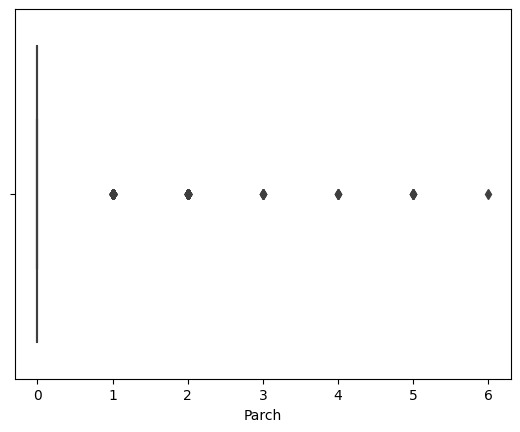

In [119]:
#individual boxplots to see the distribution of the features
sns.boxplot(x=df['Parch'])

### Feature Engineering

What we can do here:

Do all of this after splitting into test and train data

use SimpleImputer from sklearn to impute missing values

OrdinalImputer for ordinal data (such as the embarked) or use the OneHotEncoder to map them with dummy variables

### drop columns/values:

drop columns: 'Name' , ('Cabin'), 'Ticket'

drop values NaN: 'Embarked'

impute/drop values NaN: 'Age'


In [120]:
# define X to be the columns of df without 'Cabin' and 'Survived'
X = df.drop(columns=['Survived', 'Cabin', 'Name', 'Ticket', 'PassengerId'])
y = df['Survived']

### Imputation, Encoding and dropping

F.e.: SimpleImpter, OneHotEncoder, .drop

In [121]:
''' df.Cabin.unique()
# so what we could do here is to cluster the cabin values into A, B, C, D, E, F ,G and T and NaN
# and then use that as a feature this is the only way to do it
df['Cabin'] = df['Cabin'].apply(lambda x: str(x)[0])

# count the sum of the unique values in the Cabin column 
df['Cabin'].value_counts()
# make this a categorical feature so that we can use it in our model
df = pd.get_dummies(df, columns=['Cabin'], drop_first=True)
'''


" df.Cabin.unique()\n# so what we could do here is to cluster the cabin values into A, B, C, D, E, F ,G and T and NaN\n# and then use that as a feature this is the only way to do it\ndf['Cabin'] = df['Cabin'].apply(lambda x: str(x)[0])\n\n# count the sum of the unique values in the Cabin column \ndf['Cabin'].value_counts()\n# make this a categorical feature so that we can use it in our model\ndf = pd.get_dummies(df, columns=['Cabin'], drop_first=True)\n"

In [122]:
# make the object feature 'Mebarked' to a categorical feature so that S =1, C=2, Q=3
# or look at sklearn OneHotEncoder
X = pd.get_dummies(X, columns=['Embarked'], drop_first=False, dtype = np.int64)
# still need to drop the nan values in Embarked


In [123]:
#drop the age nan values
X = X.dropna(subset=['Age'])
y = y[X.index]


In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      714 non-null    int64  
 1   Sex         714 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       714 non-null    int64  
 4   Parch       714 non-null    int64  
 5   Fare        714 non-null    float64
 6   Embarked_C  714 non-null    int64  
 7   Embarked_Q  714 non-null    int64  
 8   Embarked_S  714 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 55.8 KB


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
log_reg =LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/kevin/Documents/week5_new/logistic-regression/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

In [133]:
#test the accuracy of the model
confusion_matrix(y_train, y_pred_train)
#give the accuracy score and the r2 score
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))


#f1 score
print(f1_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))



0.8108581436077058
0.7482517482517482
0.6603773584905661
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        87
           1       0.70      0.62      0.66        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



### What to improve:

1. Imputing the missing values of the Age column: f.e. use the PClass value to calculate the mean values of the passengers in the classes, then write a function which imputes the corresponding mean age for the passengers

2. Plotting the correlations of the features AND the target: if there are some highly correlating ones, drop one of them AND construct a baseline model (f.e. just a prediction with the feature "sex")